# 46-932, Simulation Methods for Option Pricing: Homework 1

*Author*  : Jordan Giebas <br>
*Due Date*: Jan. 25, 2018

## Question 1
Practice on the Probability Integral Transform. 

### 1a

The pdf given is:

\\[ f_X(x) =
    \begin{cases} 
      k\lambda(\lambda x)^{k-1}e^{-(\lambda x)^{k}}& x\geq 0 \\
      0 & x < 0
   \end{cases}
\\]

Hence, we must determine the form of the cdf and then perform the Probability Integral Transform. <br>


\\[ F_X(x) = P(X < x) = \int_{-\infty}^{x} f_X(s)ds = \int_{0}^{x} k\lambda(\lambda s)^{k-1}e^{-(\lambda s)^{k}}ds \\]

Making the substitution $u = -(\lambda s)^{k}$, it follows that $du = k\lambda(\lambda s)^{k-1}ds$. The lower limit remains zero, and the upper limit becomes $(\lambda x)^{k}$. We then have,

\\[ F_X(x) = \int_{0}^{(\lambda x)^{k}} e^{-u} du \\]

Solving this integral, we find that the cdf of this distribution is of the form

\\[ F_X(x) =
    \begin{cases} 
      1 - e^{-(\lambda x)^{k}} & x\geq 0 \\
      0 & x < 0
   \end{cases}
\\]

Setting $u = F_X(x)$ (over the non-trivial domain) and solving for $x$ is quite easy,

\\[ u = F_X(x) = 1 - e^{-(\lambda x)^{k}} \implies 1 - u = e^{-(\lambda x)^{k}} 
                                          \implies (\lambda x)^{k} = ln\big(\frac{1}{1-u}\big)
                    \implies x = \frac{1}{\lambda}\big(ln\big(\frac{1}{1-u}\big)\big)^{\frac{1}{k}} := g(u)\\]
                               
It follows that simulating random variables with $f_X(x)$ as the pdf is equivalent to applying the above function, $g(u)$, to simulated standard uniform random variables.

### 1b

The cdf given is:

\\[ F_X(x) =
    \begin{cases} 
      1 - \exp{\big(\frac{-2x(x-b)}{h}\big)} & x\geq max(b,0) \\
      0 & otherwise
   \end{cases}
\\]

Setting $u = F_X(x)$ (over the non-trivial domain) and solving for $x$ is quite easy,
<br>

$$ u = F_X(x) = 1 - exp\big(\frac{-2x(x-b)}{h}\big) \implies \frac{h}{2}ln\big(\frac{1}{1 - u}\big) = x(x-b) 
$$ <br>
                               
Now we must complete the square,

$$ x(x-b) = x^2 - bx = (x - \frac{b}{2})^2 - (\frac{b}{2})^2 $$

Plugging this in, adding the $(\frac{b}{2})^2$ to the other side and taking the square root we find that,

$$ x = (\frac{b}{2})^2 \pm \sqrt{\frac{h}{2}ln\big(\frac{1}{1 - u}\big)} := g(u) $$ <br>

We take the negative root to ensure that $x \geq max(0,b)$. <br>

It follows that to simulate random variables with such a distribution, one should simulate uniform random variables and plug them into $g(u)$ (with the negative root).




### 1c

The pdf given is:

\\[ f_X(x) = \frac{1}{\pi}\frac{1}{1+x^2}\\]

Hence, we must determine the form of the cdf and then perform the Probability Integral Transform. <br>


\\[ F_X(x) = P(X < x) = \int_{-\infty}^{x} f_X(s)ds = 
\int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+s^2} ds \\]

The substitution to be made is $s = tan(\theta)$, equipped with $ds = sec^2(\theta)d\theta$, this becomes quite an easy integral. I happened to recall this by observation from CalcII?, so I state the result for the indefinite integral. 

\\[ \int \frac{1}{1+x^2} dx = arctan(x) \\]

Now we just analyze the boundaries- we have an improper integral as the lower bound is $-\infty$, therefore we take a limit

\\[ F_X(x) = \int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+s^2} ds 
           = \frac{1}{\pi}(arctan(x) - \lim_{b\to-\infty} arctan(b))\\]

Examining the graph of $f(x) = arctan(x)$, it's clear that $\lim_{x\to-\infty} arctan(x) = -\frac{\pi}{2}$. Hence, we (finally) have the final form of the cdf.

\\[ F_X(x) = \frac{1}{\pi}arctan(x) + \frac{1}{2}, x \in \mathbb{R} \\]

Setting $u = F_X(x)$ and solving for $x$,

\\[ u = F_X(x) = \frac{1}{\pi}(arctan(x) + \frac{1}{2}) \implies 2\pi u = 2arctan(x) + \pi \\ \\] 

\\[ \implies \frac{2\pi u - \pi}{2} = arctan(x) \\ \implies x = tan\big(\frac{\pi}{2}(2u-1)\big) := g(u) \\]

                               
It follows that simulating random variables with a *cauchy distribution* is equivalent to applying the above function, $g(u)$, to simulated standard uniform random variables.



### 1d

#### (i)

The cdf is provided to us, and defined over all reals,

$$ F_{X}(x) = exp(exp(-x)) $$ 

So we set $u$ equal to the cdf, and solve for $x$ per usual.

$$ u = exp(exp(-x)) \implies ln(u) = exp(-x) \implies x = -ln(ln(u)) := g(u)  $$

We see that generating uniform random variables and applying $g(u)$ to them will yield random variables with the so-called Gumbel distribution.

#### (ii)

We'd like $M_{n}-a_{n}$ to have the Gumbel distribution. To determine a sequence $\{a_n\}$ such that this is the case, we first determine the cdf of $M_{n}-a_{n}$ as follows,

$$ P(M_{n}-a_{n}\leq x) \implies P(M_{n}\leq x + a_{n})\\ \implies 
P((X_{1} \leq x + a_{1}) \cap ... \cap (X_{n} \leq x + a_{n}))\\ $$ 
$$\implies \prod_{i=1}^{n} F_{X}(x + a_{n}) \\ = \big[F_{X}(x+a_{n})\big]^{n}\\ 
\implies \big[exp(-exp(-(x+a_{n}))\big]^{n}$$

We are seeking a $\{a_n\}$ such that this redices to the gumbel distribution. A natural choice is $\{a_n\} = log(n)$. Not only is this natural, but it will bring an $n$ in the denominator and using exponentiation rules this will cancels with the $n$ in the exponent. So with $\{a_n\} = lg(n)$,

$$ \big[F_{X}(x+a_{n})\big]^{n} = \big[exp(-exp(-(x+lg(n)))\big]^{n} \\
= \big[exp(-\frac{exp(-x)}{n})\big]^{n} $$
$$= \big[exp(-n\frac{exp(-x)}{n})\big] \\ = exp(-exp(-x)) \\ = F_{X}(x) $$

Hence, we see that choosing the sequence $\{a_{n}\} = lg(n)$ forces the process $M_{n} - a_{n}$ to have the Gumbel distribution. This sequences precisely defines the growth of $M_{n}$ as logarithmic.


## Question 2

Application of the Probability Integral Transform and the aliasing algorithm in the context of credit rating transitions based of continuous (semi) Markov theory.

### 2a

This is an application of continuous Markov theory, for we use the exponential distribution to draw the holding time in which a process will stay in a particular state. The parameters for a given state of the exponential distribution of provided with the dataframe params. 

First, we must build the 'stacked' alias table. In particular, the alias table for each state goes into a list to which we will later reference when deciding to which state j our current state i should travel. 

In [3]:
import pandas as pd
import numpy as np


########################################################
"""
Alias Table Construction
    From the matrix provided, build an alias table 
    (type pd.DataFrame()) for each row. Once this is done, 
    then stack the alias tables on top of one another
"""
########################################################

# We need to build a dataframe from the matrices given
# to pass into build_dataframe. This way we can reuse that 
# function in constructing the alias table. (i=1 rn)
def df_from_matrix( mat_df, i ):
    
    f_row = mat_df.loc[i]
    j_s = pd.Series(np.arange(1,9), index=pd.RangeIndex(start=1, stop=9))
    df = pd.DataFrame()
    df[0] = j_s
    df[1] = f_row
    df.index = pd.RangeIndex(start=0, stop=8)
    
    return df

# input : File path string
# output: Dataframe containing the discrete probability distribution
def build_dataframe( df ):
    
    #df = pd.read_csv(file_path, header=None)             # Read csv, label the columns
    
    df.columns = ['x','p']
    df = df.sort_values(by=['p'])                        # Sort by probability in Ascending order
    df['p_star'] = df['p']*(len(df.index) - 1)           # p*_i = (m-1)*p_i
    df.index = range(0,len(df.index))                    # Reindex afterwards
    
    return df


# input : Dataframe containing the discrete probability distribution
# output: Alias table for discrete distribution (constant time evaluation for simulation)
def build_alias_table( pmf_df ):
    
    # Build alias table
    alias_table = pd.DataFrame(columns=list('PXA'))

    while(len(pmf_df.index) != 1):

        # Update the Alias Table
        tmp = pd.DataFrame([[pmf_df.p_star[0], pmf_df.x[0], pmf_df.x[len(pmf_df.index)-1]]], columns=list('PXA'))
        alias_table = alias_table.append(tmp, ignore_index=True)

        # Alter the dataframe
        pmf_df.p_star[len(pmf_df.index)-1] -= (1-pmf_df.p_star[0]) # Subtaract (1-p*_1) from p*_max
        pmf_df = pmf_df.drop([0])                                  # Drop the (x1,p*_1) row
        pmf_df = pmf_df.sort_values(by=['p_star'])                 # Sort values as needed
        pmf_df.index = range(0,len(pmf_df.index))                  # Reindex the dataframe to begin at 0
        
    return alias_table

    
## Get the stacked alias table
def stacked_alias_table( mat ):
    
    #return pd.concat([build_alias_table( build_dataframe( df_from_matrix(P, i) ) ) 
                         #for i in range(1, len(mat)+1)]) 
    a_t = [build_alias_table( build_dataframe( df_from_matrix(P, i) ) ) for i in range(1, len(mat)+1)]
    
    return a_t, pd.concat(a_t)


The following dataframes are from the data provided for the Q and P matrix, and params vector. 

In [4]:
"""
Construct the:
    Q-matrix
    M-matrix
    lambda-vector (params)
"""


Q = pd.DataFrame(np.array(
  [[-.1154, .1019, .0083, .0020, .0031, 0, 0, 0],    
  [.0091, -.1043, .0787, .0105, .0030, .0030, 0, 0],   
  [.0010, .0309, -.1172, .0688, .0107, .0048, 0, .0010],    
  [.0007, .0047, .0713, -.1711, .0701, .0174, .0020, .0049],    
  [.0005, .0025, .0089, .0813, -.2530, .1181, .0144, .0273],
  [0, .0021, .0034, .0073, .0568, -.1928, .0479, .0753],
  [0,0,.0142, .0142, .0250, .0928, -.4318, .2856],
  [0, 0, 0, 0, 0, 0, 0, 0]]), 
                 index=pd.RangeIndex(start=1, stop=9, step=1),
                 columns=pd.RangeIndex(start=1, stop=9, step=1))


P = pd.DataFrame(np.array(
    [[0,.8838, .0720, .0173, .0269, 0, 0, 0],
    [.0872, 0, .7545, .1007, .0288, .0288, 0,0],
    [.0085, .2637, 0, .5870, .0913, .0410, 0, .0085],
    [.0041, .0275, .4167, 0, .4097, .1017, .0117, .0286],
    [.0020, .0099, .0352, .3213, 0, .4668, .0569, .1079],
    [0, .0109, .0176, .0379, .2946, 0, .2484, .3906],
    [0, 0, .0329, .0329, .0579, .2149, 0, .6614],
    [0,0,0,0,0,0,0,1]]), 
                 index=pd.RangeIndex(start=1, stop=9, step=1),
                 columns=pd.RangeIndex(start=1, stop=9, step=1))


params = pd.DataFrame(np.array([.1154, .1043, .1172, .1711, .2530, .1929, .4318, .0001]),
                   index=pd.RangeIndex(start=1, stop=9, step=1),
                   columns=[1])



In [5]:
# Build the stacked alias table, and get the alias table list
sat_l, sat = stacked_alias_table(Q)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# Check the shape of the stacked alias table (sat), should be (56,3)
sat.shape

(56, 3)

Next, define functions that will be used for simulating the final state of the credit rating. <br>
The `exp_rv()` function uses the probability integral transform to generate exponentially distributed random variables with a particular parameter. <br>
The `alias_algo( a_table )` function performs the alias algorithm described in lecture by passing in the appropriate alias table to the state.

In [7]:
"""
Function:
generate exponentially distributed random numbers
using the probability integral transform
"""
def exp_rv( lambda_i ):
    
    return ( (-1.0/lambda_i)*np.log(1-np.random.uniform()) )

"""
Function:
Perform the aliasing algorithm using the 
correct alias table.
"""
def alias_algo( a_table ):
    
    u = np.random.uniform() # Generate a Uniform(0,1) RV
    v = len(a_table)*u
    i = np.ceil(v)
    w = i - v
    
    if w <= a_table.P.loc[i-1]:
        return a_table.X.loc[i-1]
    else:
        return a_table.A.loc[i-1]

Now we perform the guts of the program, simulating the state of the credit rating after 5 years. <br>
(**Note**: I perform 100,000 simulations not 1,000,000. This is purely because the structure of my program is apparently not equipped to handle 1,000,000 - it takes far too long. Future considerations: use parallel processes / multi threaded since each of the simulations are independent from the rest, this would be very practical. One update: (a) I tried using numpy arrays instead of a dictionary and a list, but that still was computationally inefficient. (b) I tried removing all function calls from the code block and using the body of each of those calls within the cell, that way there's no function call on the stack... I'm not sure why it takes so long.)

In [89]:
## Not needed just extra:
#ratings = {1: 'AAA', 2: 'AA', 3: 'A', 4: 'BBB', 5: 'BB', 6: 'B', 7: 'CCC', 8: 'D'}

# Now that the stacked alias table is constructed, we perform the actual problem.
T = 5

test_dict = {}
for z in range(1,9):
    
    test_dict[z] = list()
    for k in range(100000):

        i = z
        clock = 0
        while( clock <= T ):

            # Generate the holding time
            ht = exp_rv(float(params.loc[i]))

            # Update the clock
            clock += ht

            # Check to see if you're past 'maturity'
            # If so break out of the loop
            if (clock > T):

                #print("The rating (state) is ", ratings[i])
                test_dict[z].append(i)
                break

            else:

                # Choose a new rating (alias algorithm)
                i = alias_algo(sat_l[i-1]) 
                        

The code below defines two functions <br>
<ol> 
    <li>`build_transprob_df( tp_dict )`: is pass in a dictionary with each key representing an initial state, and it's associated to a list with the states to which it ended after T=5 years. The function uses this data to return a dataframe containing the transition probabilities, which will be compared with the P = expm(Q*t) as mentioned in lecture 
    <li> `std_error( x )`: is a function that computes the standard error of an estimate as described in class. Given this is Bernoulli, the standard error is given by  $$\sqrt{\frac{\hat{p}_{i,j}(t)\big(1 - \hat{p}_{i,j}(t)\big)}{n}}$$
    

In [9]:
def build_transprob_df( tp_dict ):
    
    for k in tp_dict.keys():
        
        i_list = [(tp_dict[k].count(i))/(float(len(tp_dict[k]))) for i in range(1,9)]
        tp_dict[k] = i_list
    
    return pd.DataFrame.from_dict(tp_dict, orient='index')

def std_error( x ):
    
    return np.sqrt(x*(1-x)/10000)

In [91]:
tp_df = build_transprob_df(test_dict)
tp_df.columns = pd.RangeIndex(start=1,stop=9)
tp_df

,1,2,3,4,5,6,7,8
1,0.56990,0.30041,0.08427,0.02379,0.01235,0.00622,0.00071,0.00235
2,0.02783,0.61923,0.24038,0.06731,0.02036,0.01662,0.00166,0.00661
3,0.00523,0.09444,0.60914,0.18557,0.05234,0.03109,0.00395,0.01824
4,0.00328,0.02988,0.19091,0.48470,0.14175,0.08187,0.01151,0.05610
5,0.00179,0.01272,0.05617,0.16128,0.33636,0.21998,0.03366,0.17804
6,0.00051,0.00766,0.02219,0.04237,0.10751,0.43067,0.05887,0.33022
7,0.00035,0.00384,0.02885,0.03478,0.04750,0.12000,0.12751,0.63717
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [92]:
stderr_df = tp_df.apply(std_error)
stderr_df

,1,2,3,4,5,6,7,8
1,0.004951,0.004584,0.002778,0.001524,0.001104,0.000786,0.000266,0.000484
2,0.001645,0.004856,0.004273,0.002506,0.001412,0.001278,0.000407,0.000810
3,0.000721,0.002924,0.004879,0.003888,0.002227,0.001736,0.000627,0.001338
4,0.000572,0.001703,0.003930,0.004998,0.003488,0.002742,0.001067,0.002301
5,0.000423,0.001121,0.002302,0.003678,0.004725,0.004142,0.001804,0.003825
6,0.000226,0.000872,0.001473,0.002014,0.003098,0.004952,0.002354,0.004703
7,0.000187,0.000618,0.001674,0.001832,0.002127,0.003250,0.003335,0.004808
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 2b

Now we do the same thing, but we deviate from continuous Markov theory in that we generate the holding time by sampling from a Gamma distribution. In essence, we simply generate two exponential random variables and sum them since we want $\frac{1}{2}\Gamma(2,\lambda_{i})$. <br>

We perform the same code block, except the holding time is generated slightly differently.

In [8]:
## Not needed just extra:
#ratings = {1: 'AAA', 2: 'AA', 3: 'A', 4: 'BBB', 5: 'BB', 6: 'B', 7: 'CCC', 8: 'D'}

# Now that the stacked alias table is constructed, we perform the actual problem.
T = 5

test_dict = {}
for z in range(1,9):
    
    test_dict[z] = list()
    for k in range(100000):

        i = z
        clock = 0
        while( clock <= T ):

            # Generate the holding time
            ht = exp_rv(float(params.loc[i])) + exp_rv(float(params.loc[i]))

            # Update the clock
            clock += ht

            # Check to see if you're past 'maturity'
            # If so break out of the loop
            if (clock > T):

                #print("The rating (state) is ", ratings[i])
                test_dict[z].append(i)
                break

            else:

                # Choose a new rating (alias algorithm)
                i = alias_algo(sat_l[i-1]) 
                        

In [10]:
tp_df_gamma = build_transprob_df(test_dict)
tp_df_gamma.columns = pd.RangeIndex(start=1,stop=9)
tp_df_gamma

,1,2,3,4,5,6,7,8
1,0.88473,0.10098,0.00922,0.00217,0.00259,0.00024,0.00001,0.00006
2,0.00802,0.90278,0.07239,0.01082,0.00311,0.00272,0.00005,0.00011
3,0.00115,0.03015,0.88588,0.06522,0.01103,0.00510,0.00019,0.00128
4,0.00100,0.00616,0.08498,0.79366,0.07842,0.02444,0.00298,0.00836
5,0.00076,0.00377,0.01524,0.11070,0.64587,0.15873,0.01820,0.04673
6,0.00003,0.00292,0.00524,0.01181,0.06709,0.75591,0.04988,0.10712
7,0.00001,0.00042,0.02174,0.02127,0.03643,0.12660,0.36604,0.42749
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [11]:
stderr_df_gamma = tp_df_gamma.apply(std_error)
stderr_df_gamma

,1,2,3,4,5,6,7,8
1,0.003193,0.003013,0.000956,0.000465,0.000508,0.000155,0.000032,0.000077
2,0.000892,0.002963,0.002591,0.001035,0.000557,0.000521,0.000071,0.000105
3,0.000339,0.001710,0.003180,0.002469,0.001044,0.000712,0.000138,0.000358
4,0.000316,0.000782,0.002789,0.004047,0.002688,0.001544,0.000545,0.000911
5,0.000276,0.000613,0.001225,0.003138,0.004782,0.003654,0.001337,0.002111
6,0.000055,0.000540,0.000722,0.001080,0.002502,0.004295,0.002177,0.003093
7,0.000032,0.000205,0.001458,0.001443,0.001874,0.003325,0.004817,0.004947
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Question 3
Studying the quality of various normal generation methods. <br>

Simulate three sets of observations (n=100,1000,10,000) to have the standard normal distribution using methods (a) and (b). Construct a Q-Q (normal) plot for each, comment on the quality of the methods based on your normal plots. 

### 3a
Use Python's numpy.random normal generator to generate random variables and construct the Q-Q plots.

In [1]:
# Use numpy's normal RV generator
import numpy as np
import pylab 
import scipy.stats as stats
import matplotlib

def get_plt(data):
    
    stats.probplot(data, dist="norm", plot=pylab)
    pylab

# Sample the normal distribution
norm_rv = [np.random.normal(size=n) for n in [100, 1000, 10000]]

get_plt(norm_rv[0])

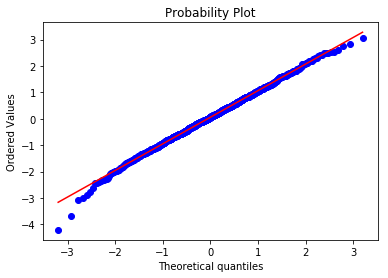

In [2]:
get_plt(norm_rv[1])

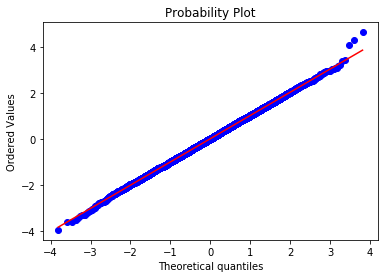

In [4]:
get_plt(norm_rv[2])

It appears that as $n$ gets larger, the data is fit nearly perfectly around the trendline suggesting that the normal generator within python is quite accurate.

### 3b
Use the "poor man's" normal generator: simulate 12 standard uniform vars $\{U_{i}\}_{i=1}^{12}$, and compute $\sum_{i=1}^{12} U_{i}-6$

In [5]:
# Generate 12 independent standard uniform rvs

def gen_pm_norm_rv():
    u_rv = np.random.uniform(size=12)
    return ( np.sum(u_rv) - 6.0 )


l_100 = list()
for i in range(100):
    l_100.append(gen_pm_norm_rv())
    
pm_norm_rv = [[gen_pm_norm_rv() for i in range(n)] for n in [100,1000,1000]]

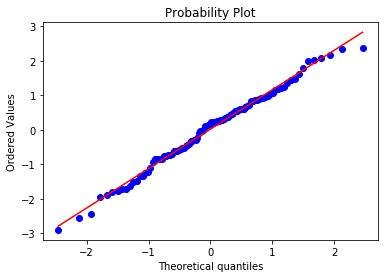

In [6]:
get_plt(pm_norm_rv[0])

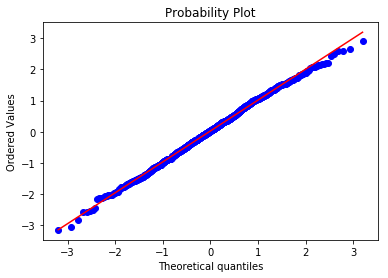

In [7]:
get_plt(pm_norm_rv[1])

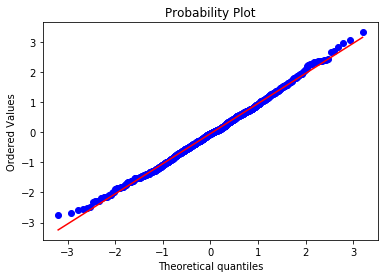

In [8]:
get_plt(pm_norm_rv[2])

Using the "poor man's normal generator" yields quite good results actually. However, they are certainly not as precise as using Python's normal random number generator. One can see this by simply comparing the $n=10,000$ plots. There is more variability at the extreme ends of the "poor man's" plot than in the plot constructed with Python's generator. 